In [4]:
import h2o
print(h2o.__version__)
from h2o.automl import H2OAutoML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

3.32.0.3


### Datos
Los datos fueron tomados de la plataforma Kaggle. En está existe una competencia sobre MNIST, me pareció buena idea participar utilizando lo aprendido en la materia AutoML.

In [5]:
train = h2o.import_file("./data/train.csv")
test = h2o.import_file("./data/test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
train.head()


label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,255,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,250,253,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,248,253,167,10,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,30,137,137,192,86,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,86,250,254,254,254,254,217,246,151,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,179,254,254,254,254,254,254,254,254,254,231,54,15,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,141,139,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,254,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,254,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,179,6,0,0,0,0,0,0,0,0,9,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,247,17,0,0,0,0,0,0,0,0,27,202,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,130,155,254,254,254,157,30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,103,253,253,253,253,253,253,253,253,114,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,208,253,253,253,253,253,253,253,253,253,253,107,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [7]:
x = train.columns[1:]
y = 'label'
train[y] = train[y].asfactor()

In [8]:
aml = H2OAutoML(max_models=30, seed=45, max_runtime_secs=28800)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [9]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
StackedEnsemble_AllModels_AutoML_20210130_153230,0.0245593,0.105031,0.156692,0.0245525,nan,nan
StackedEnsemble_BestOfFamily_AutoML_20210130_153230,0.0260769,0.129512,0.173266,0.0300211,nan,nan
XGBoost_3_AutoML_20210130_153230,0.030542,0.100873,0.162219,0.026315,nan,nan
XGBoost_grid__1_AutoML_20210130_153230_model_6,0.0310472,0.100031,0.162032,0.0262544,nan,nan
XGBoost_grid__1_AutoML_20210130_153230_model_3,0.0317113,0.10236,0.168243,0.0283058,nan,nan
XGBoost_1_AutoML_20210130_153230,0.0322263,0.104387,0.16804,0.0282374,nan,nan
XGBoost_grid__1_AutoML_20210130_153230_model_4,0.0331264,0.106237,0.171733,0.0294922,nan,nan
XGBoost_grid__1_AutoML_20210130_153230_model_1,0.0331854,0.108497,0.173228,0.030008,nan,nan
XGBoost_grid__1_AutoML_20210130_153230_model_5,0.0339397,0.112468,0.175702,0.0308713,nan,nan
XGBoost_2_AutoML_20210130_153230,0.0344649,0.114906,0.17905,0.032059,nan,nan


In [10]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210130_153230

No model summary for this model

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0009735526827092279
RMSE: 0.031201805760391943

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.02455245642029528
RMSE: 0.15669223471600396


In [13]:
preds = aml.predict(test)
preds['p1'].as_data_frame().values.shape

stackedensemble prediction progress: |████████████████████████████████████| 100%


(28000, 1)

In [53]:
test_df = test.as_data_frame()

In [29]:
predictions = preds.as_data_frame()["predict"]

In [79]:
submite = pd.read_csv("./data/sample_submission.csv")

In [80]:
submite["Label"] = predictions

In [81]:
submite.to_csv("submission_file.csv", index=False)

In [68]:
test_df =  test_df.values.reshape(-1, int(np.sqrt(784)), int(np.sqrt(784)), 1)/255.0

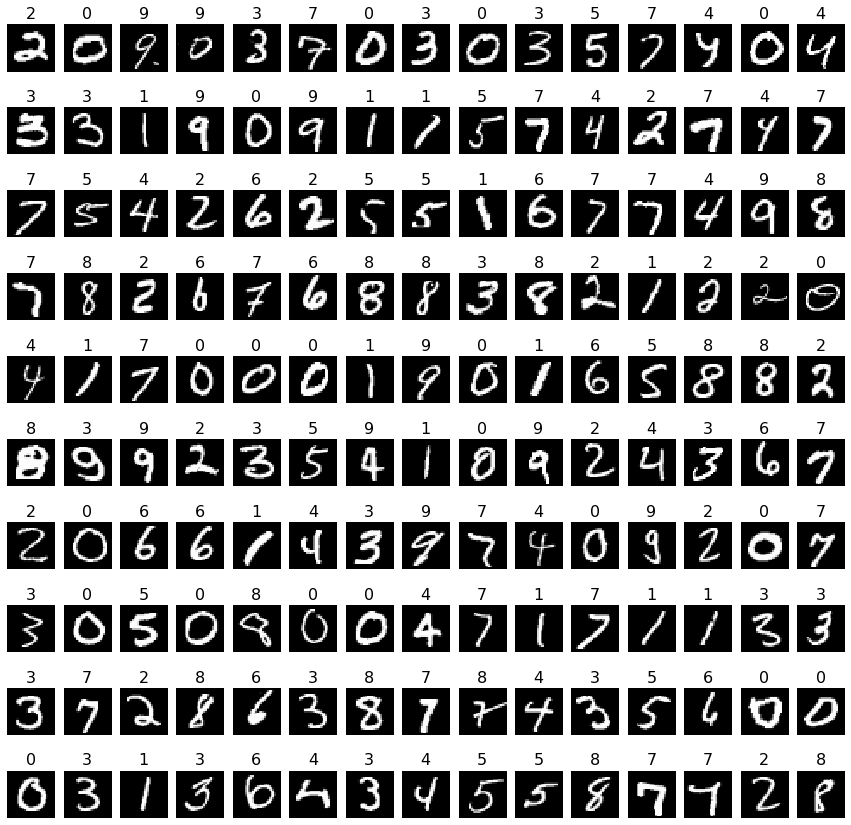

In [77]:
counter = 0
rows = 10
cols = 15
fig = plt.figure(figsize=(15,15))
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(np.squeeze(test_df[counter + i-1]), cmap='gray')
    plt.title(predictions[counter + i-1], fontsize=16)
    plt.axis(False)
    fig.add_subplot
counter += rows*cols

### Resultado Kaggle

![Captura de Pantalla.png](attachment:Captura de Pantalla.png)

Si bien los resultados son muy buenos, estamos trabajando sobre un problema muy conocido sobre el que se realizan gran catidad de pruebas constantemente. Sin embargo, obtener 0.97539 en el primer intento y con poco esfuerzo humano lo considero un exito absoluto.
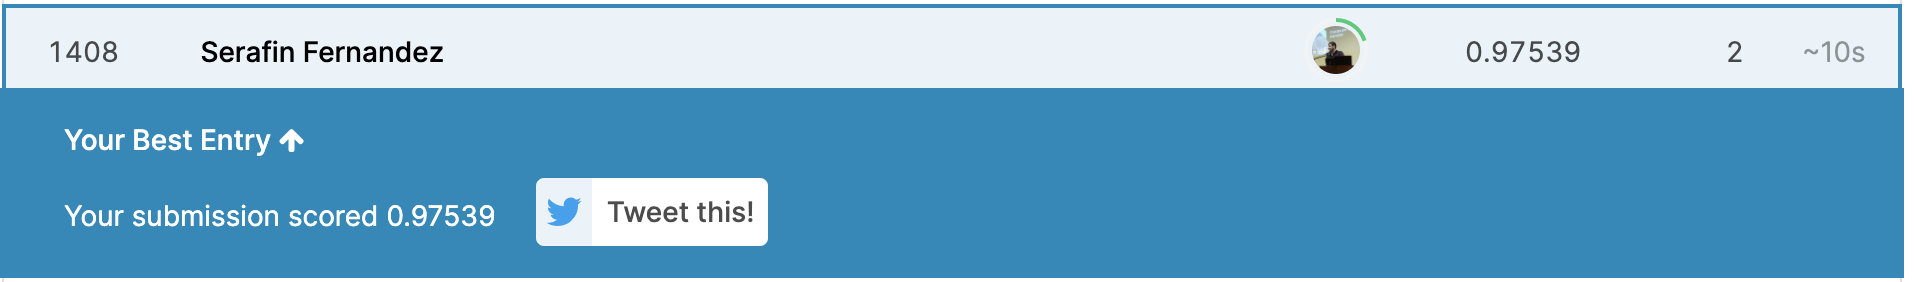

### Conclusiones:

En muy poco tiempo pude generar un excelente modelo para el procesamiento del dataset MINST. El esfuerzo humano fue realmente bajo, sin embargo el esfuerzo computacional fue de aproximadamente 12 horas en una instancia con gran poder de procesamiento.

Como se ve en la imagen, con esta solución quede en la posición 1408 en la competición. Esto nos hace ver que las soluciones a mano probablemente conlleven un mejor resultado con el estado actual de AutoML, sin embargo es una tecnologia en constante crecimiento que vale la pena seguir de cerca.

Me parece un excelente metodo para conseguir modelos baseline sobre los cuales seguir trabajando con poco esfuerzo humano. Sin lugar a dudas es algo que voy a utilizar en el futuro.